#**Student Academic Performance Dataset - EDA and Preprocessing Pipelines**

**Autor:** Oscar Ivanovich Avila Chiu 35676

##**Introducción**

En este notebook se realizará un análisis exploratorio de datos (EDA) sobre un conjunto de datos relacionado con el desempeño académico de estudiantes, seguido de la construcción de pipelines de preprocesamiento para variables numéricas y categóricas.

El conjunto de datos contiene información sobre distintos factores que pueden influir en el rendimiento académico de los estudiantes, tales como hábitos de estudio, asistencia, entorno familiar, acceso a recursos educativos y características personales. La variable objetivo corresponde al puntaje obtenido en el **examen final (Exam_Score)**, por lo que el problema se plantea como un problema de **regresión**.

El dataset fue obtenido desde la plataforma Kaggle, y se encuentra disponible en el siguiente enlace:
https://www.kaggle.com/datasets/ayeshasiddiqa123/student-perfirmance

A continuación, se importarán las librerías necesarias y se cargará el conjunto de datos en un DataFrame de pandas para comenzar con su exploración y análisis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [4]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


##**Información básica y estadística**

Se utiliza el método .info() para obtener una mejor comprensión del conjunto de datos, ya que permite identificar el número de registros no nulos y el tipo de dato correspondiente a cada columna.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

De manera similar, se utiliza el método .describe() para obtener estadísticas descriptivas de las variables numéricas del conjunto de datos. En este caso, el resultado se transpone con el objetivo de mejorar la legibilidad y facilitar la interpretación de los valores obtenidos.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


En total, el conjunto de datos cuenta con 20 columnas, las cuales describen características académicas, familiares, sociales y personales de los estudiantes:

* Hours_Studied: Número de horas que el estudiante dedica al estudio
* Attendance: Porcentaje de asistencia a clases
* Parental_Involvement: Nivel de involucramiento de los padres en la educación del estudiante
* Access_to_Resources: Disponibilidad de recursos educativos
* Extracurricular_Activities: Participación en actividades extracurriculares
* Sleep_Hours: Horas de sueño promedio por día
* Previous_Scores: Puntajes obtenidos previamente en evaluaciones
* Motivation_Level: Nivel de motivación del estudiante
* Internet_Access: Disponibilidad de acceso a internet
* Tutoring_Sessions: Número de sesiones de tutoría recibidas
* Family_Income: Nivel de ingresos familiares
* Teacher_Quality: Calidad percibida del docente
* School_Type: Tipo de escuela (pública o privada)
* Peer_Influence: Influencia de los compañeros en el desempeño académico
* Physical_Activity: Nivel de actividad física
* Learning_Disabilities: Presencia de discapacidades de aprendizaje
* Parental_Education_Level: Nivel educativo de los padres
* Distance_from_Home: Distancia entre el hogar y la escuela
* Gender: Género del estudiante
* Exam_Score: Puntaje obtenido en el examen final

Para el análisis y la construcción del modelo de aprendizaje automático, se utilizará Exam_Score como variable objetivo, ya que representa el desempeño académico del estudiante.

Todas las demás columnas se consideran variables explicativas, dado que aportan información relevante para predecir el puntaje del examen final. No se eliminarán columnas en esta etapa, ya que cada una representa un factor potencialmente influyente en el rendimiento académico.

##**Visualización de la distribución de variables numéricas**

Estas variables representan características cuantitativas relacionadas con los hábitos de estudio, asistencia y desempeño previo de los estudiantes, las cuales pueden tener un impacto directo en el puntaje del examen final.

En este análisis se consideran únicamente las variables numéricas continuas. Aunque algunas variables estén representadas como enteros, no se excluyen de este análisis, ya que todas ellas corresponden a valores cuantitativos relevantes para el problema de regresión.

Para la visualización de las distribuciones se utiliza la librería seaborn, creando histogramas acompañados de estimaciones de densidad (KDE) para cada variable numérica seleccionada.

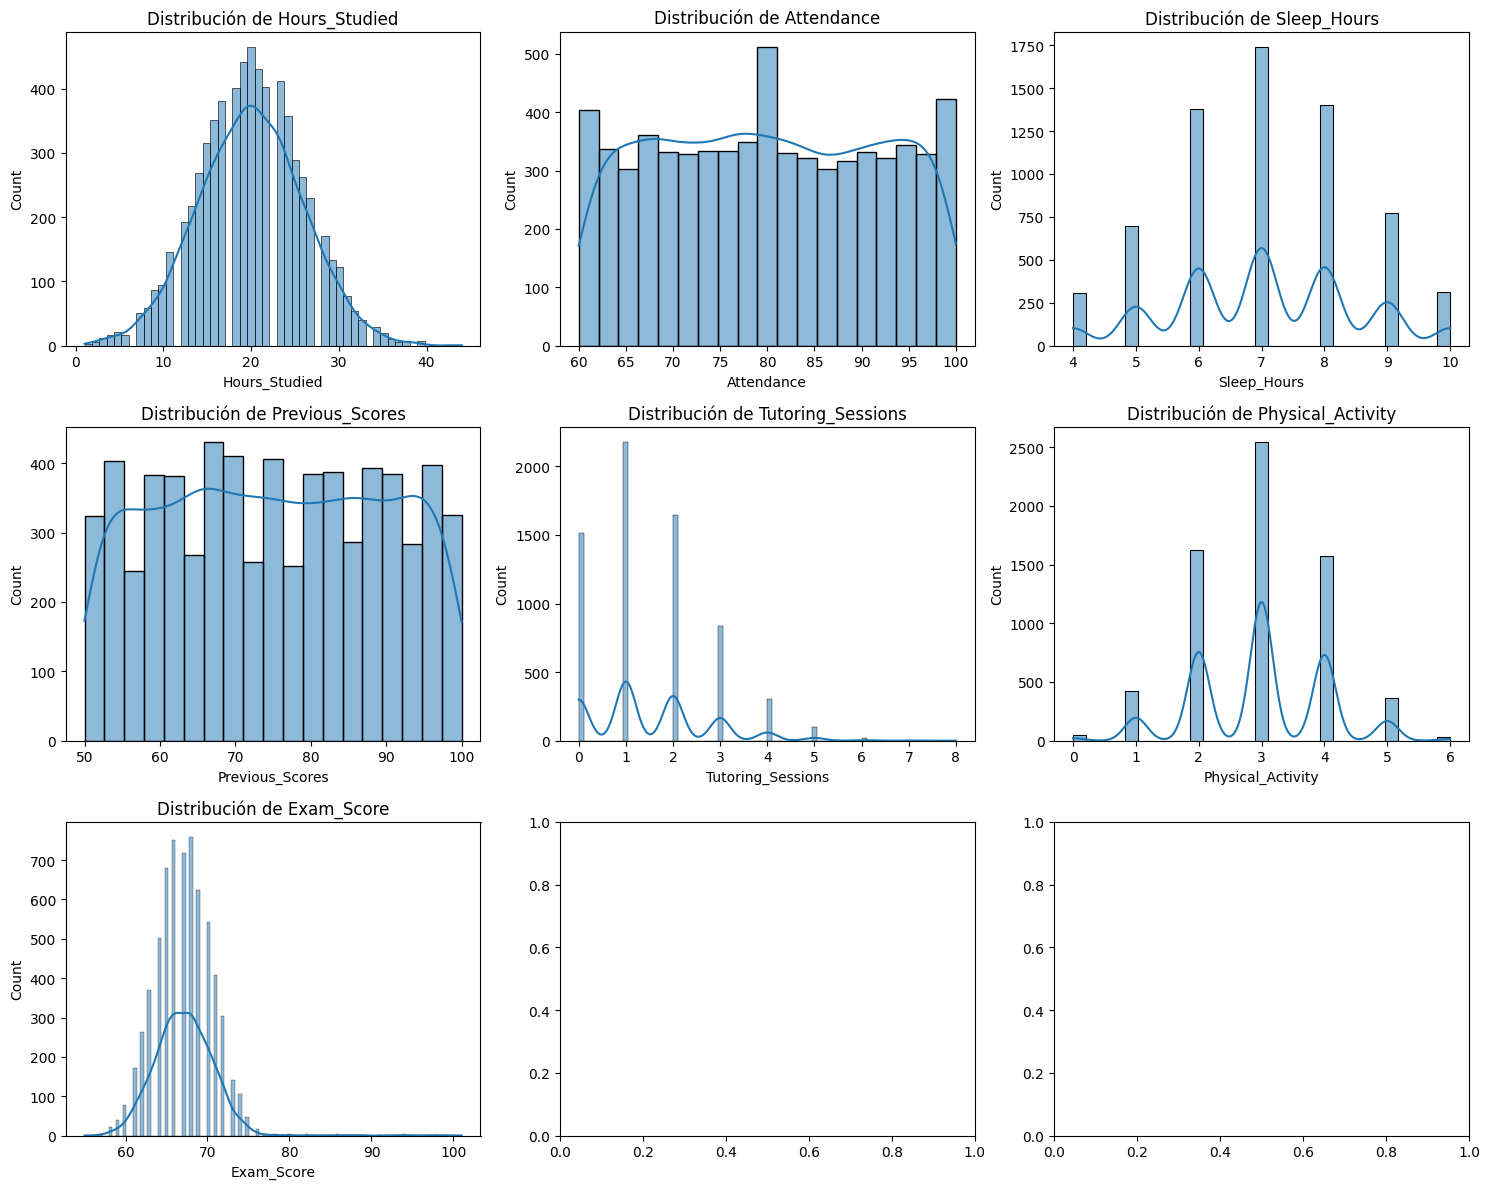

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity',
    'Exam_Score'
]

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# axs.ravel() convierte el arreglo 2D de ejes en un arreglo 1D para facilitar la iteración
for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data=data[col], kde=True, ax=ax)
    ax.set_title(f'Distribución de {col}')

fig.tight_layout()


Las variables presentan distribuciones diversas: Hours_Studied y Exam_Score tienden a una forma normal, mientras que Attendance y Previous_Scores son casi uniformes. Por otro lado, Tutoring_Sessions tiene un fuerte sesgo a la derecha y variables como Sleep_Hours muestran una naturaleza discreta con picos claros en valores enteros.

Debido a que los rangos numéricos son muy dispares (de 0 a 100), es indispensable aplicar escalamiento de datos para que las variables tengan el mismo peso en el modelo. Asimismo, se recomienda una transformación de potencia en variables sesgadas como las tutorías para normalizar su distribución y mejorar el rendimiento predictivo.

##**Visualización de variables categóricas**

A continuación, se visualizarán las distribuciones de las variables categóricas del conjunto de datos mediante gráficos de barras (countplots). Este tipo de visualización permite observar la frecuencia de cada categoría dentro de una variable, lo cual es útil para identificar posibles desbalances y entender la composición del dataset.

Para este análisis se seleccionan variables categóricas relevantes para el problema de regresión. Aquellas columnas con categorías excesivas o que no aporten información directa al análisis podrían omitirse de este tipo de visualización, sin embargo, en este caso las variables seleccionadas presentan una cardinalidad adecuada.

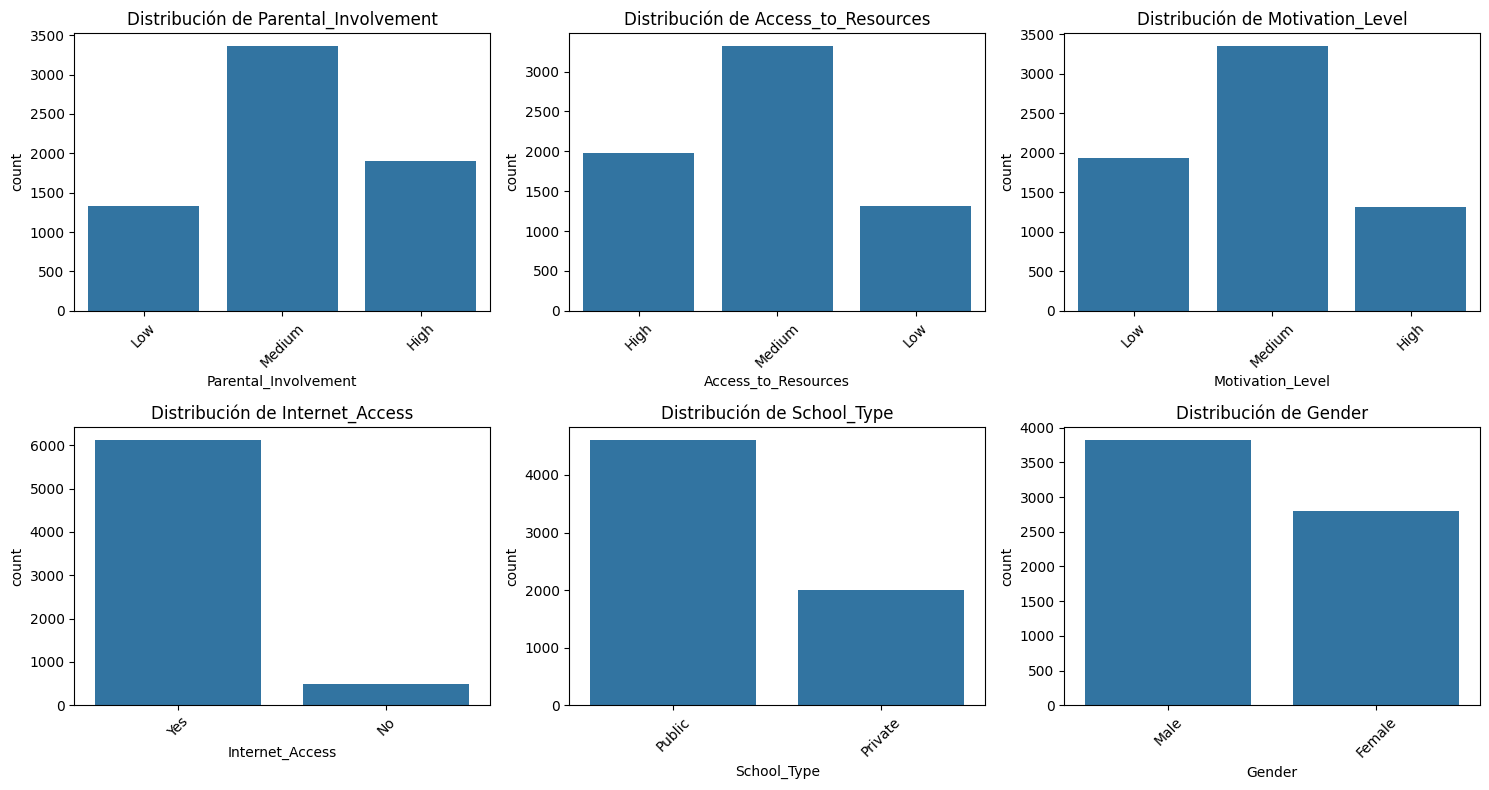

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Motivation_Level',
    'Internet_Access',
    'School_Type',
    'Gender'
]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()


A partir de las gráficas de barras para las variables categóricas, podemos observar las siguientes tendencias en el conjunto de datos de estudio:

Las gráficas muestran que la mayoría de los estudiantes cuentan con un nivel medio de involucramiento parental, acceso a recursos y motivación, destacando una clara predominancia de esta categoría sobre los niveles alto y bajo. En cuanto al entorno y demografía, existe una gran mayoría con acceso a internet y proveniente de escuelas públicas, además de una mayor representación de estudiantes de género masculino en comparación con el femenino.

Para el preprocesamiento de estas variables categóricas, utilizaremos técnicas como One-Hot Encoding en columnas binarias o nominales (como Internet_Access, School_Type y Gender) para convertirlas en un formato numérico procesable por algoritmos de Machine Learning. Asimismo, para las variables ordinales como Parental_Involvement o Motivation_Level, se podría aplicar un Ordinal Encoding para preservar el orden jerárquico de las categorías y así mejorar la precisión de las predicciones.

##**Distribución de la variable objetivo**
Finalmente, se visualizará la distribución de la variable objetivo (Exam_Score) con el fin de comprender cómo se distribuyen los puntajes obtenidos por los estudiantes en el examen final. Este análisis permite identificar posibles sesgos, concentraciones de valores o la presencia de asimetrías que podrían influir en el entrenamiento del modelo de regresión.

Dado que Exam_Score es una variable numérica continua, se utiliza un histograma acompañado de una estimación de densidad (KDE) para representar su distribución.

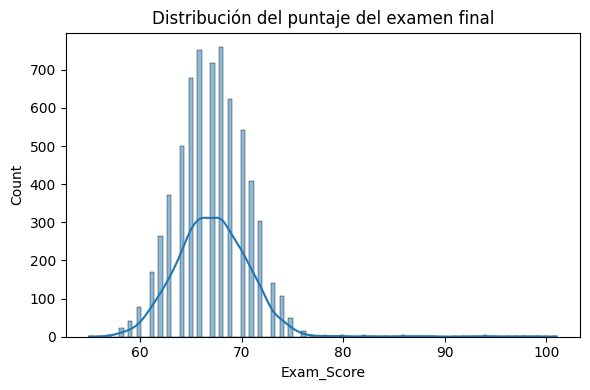

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Exam_Score', kde=True)
plt.title('Distribución del puntaje del examen final')
plt.tight_layout()

De manera similar, es posible analizar cómo se relaciona la variable objetivo (Exam_Score) con otras variables numéricas del conjunto de datos. Para ello, se utilizan boxplots, los cuales permiten visualizar la distribución del puntaje del examen en función de distintas características cuantitativas, así como identificar posibles diferencias, dispersión y valores atípicos.

Este tipo de visualización resulta útil para detectar relaciones potenciales entre las variables explicativas y el desempeño académico de los estudiantes.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores'
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x=col, y='Exam_Score', ax=ax)
    ax.set_title(f'Exam_Score vs {col}')

fig.tight_layout()


Podemos observar que existen diferencias notables en el impacto de las características numéricas sobre los resultados de los exámenes. Por ejemplo, los estudiantes que dedicaron más horas de estudio (Hours_Studied) y aquellos con un mayor porcentaje de asistencia (Attendance) tienden a obtener puntuaciones significativamente más altas en promedio. En contraste, las horas de sueño (Sleep_Hours) parecen tener un impacto mucho menor en el rendimiento final, ya que las medianas de las puntuaciones se mantienen constantes sin importar si el estudiante duerme 4 o 10 horas. En cuanto a las calificaciones previas (Previous_Scores), se observa una tendencia positiva general, aunque con una dispersión mayor de datos atípicos (outliers) que alcanzan puntuaciones perfectas independientemente de su historial.

Para las variables categóricas, se analizan las diferencias en el puntaje del examen final (Exam_Score) entre las distintas categorías de cada variable. Este análisis permite observar cómo factores como el nivel de involucramiento parental o el tipo de escuela se relacionan con el desempeño académico de los estudiantes.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'Parental_Involvement',
    'School_Type',
    'Motivation_Level'
]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.boxplot(
        data=data,
        x=col,
        y='Exam_Score',
        ax=ax,
        showfliers=False
    )
    ax.set_title(f'Exam_Score según {col}')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()


Como podemos observar, existen diferencias claras en cómo las características numéricas y categóricas influyen en los resultados de los exámenes. Por ejemplo, los estudiantes que reportan más horas de estudio (Hours_Studied) y una mayor asistencia (Attendance) muestran una tendencia ascendente constante en sus calificaciones promedio. En contraste, las horas de sueño (Sleep_Hours) parecen no tener un impacto directo en la mediana del puntaje, manteniéndose estables en todos los niveles. En cuanto a las variables categóricas, un involucramiento parental alto (Parental_Involvement) y una motivación alta (Motivation_Level) elevan notablemente el piso de las calificaciones mínimas, mientras que el tipo de escuela (School_Type) muestra una ventaja ligera en las instituciones privadas, aunque con una variabilidad muy similar a las públicas.

Para las variables categóricas, se crean gráficos de recuento (countplots) utilizando una variable derivada del puntaje del examen final (Exam_Score). En este caso, el puntaje se agrupa en rangos de desempeño académico (por ejemplo, Aprobado y Reprobado) con el objetivo de visualizar la proporción de estudiantes dentro de cada categoría sociodemográfica.

In [ ]:
data['Exam_Result'] = data['Exam_Score'].apply(
    lambda x: 'Aprobado' if x >= 70 else 'Reprobado'
)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(
        data=data,
        x=col,
        hue='Exam_Result',
        ax=ax
    )
    ax.set_title(f'Countplot {col} - Resultado')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

Se pueden realizar algunas observaciones interesantes a partir de estos gráficos. Por ejemplo, una proporción significativamente mayor de estudiantes con un involucramiento parental alto (Parental_Involvement) logró aprobar el examen en comparación con aquellos en el nivel bajo. De manera similar, los estudiantes con un nivel de motivación alto (Motivation_Level) presentan una tasa de aprobados más competitiva frente a los de motivación baja. Por último, aunque la mayoría de la muestra proviene de escuelas públicas (School_Type), se observa que los estudiantes de escuelas privadas mantienen una proporción de aprobados ligeramente más equilibrada en relación con su volumen total de alumnos.

También se utiliza una matriz de correlación (heatmap) para visualizar las relaciones entre las variables numéricas del conjunto de datos, incluyendo Hours_Studied, Attendance y Exam_Score. Esta matriz proporciona una medida cuantitativa que permite respaldar las relaciones observadas en las visualizaciones previas, como la posible relación positiva entre la asistencia y el puntaje final del examen.

Cabe destacar que variables como Gender, School_Type e Internet_Access no se incluyen en esta matriz, ya que corresponden a características categóricas representadas como cadenas de texto. En secciones posteriores, estas variables serán transformadas mediante One-Hot Encoding como parte del pipeline de preprocesamiento, lo que permitirá incorporarlas al modelo de aprendizaje automático.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity',
    'Exam_Score'
]

corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()


##**Tratando Valores Pérdidos**
Antes de construir los pipelines de preprocesamiento, es importante analizar la presencia de valores faltantes en el conjunto de datos. Para ello, visualizamos el número de valores faltantes por columna mediante un gráfico de barras.

In [ ]:
import matplotlib.pyplot as plt

missing_counts = data.isnull().sum()

plt.figure(figsize=(10, 5))
missing_counts.plot(kind='bar')
plt.title('Cantidad de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores faltantes')
plt.tight_layout()
plt.show()


También se puede calcular el porcentaje de los valores faltantes para cada columna, para entender mejor la información faltante.

In [ ]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Con base en el análisis previo de valores faltantes, es necesario definir estrategias adecuadas para su manejo dentro de los pipelines de preprocesamiento. La elección de estas estrategias depende del tipo de variable y de la proporción de datos faltantes en cada columna.
En general, para variables numéricas se utilizará imputación con la media, ya que permite conservar la distribución central de los datos sin introducir sesgos extremos. Para variables categóricas, se empleará la imputación con el valor más frecuente (moda), ya que representa la categoría más común dentro del conjunto de datos.
De manera específica, se aplicarán las siguientes estrategias:

* Parental_Education_Level:
Al ser una variable categórica con un pequeño porcentaje de valores faltantes (≈1.36%), se imputarán los valores faltantes utilizando la categoría más frecuente. Esta estrategia preserva la distribución original de los niveles educativos parentales.

* Teacher_Quality:
Esta variable categórica presenta alrededor de 1.18% de valores faltantes. Se imputarán utilizando el valor más frecuente, ya que es razonable asumir que la calidad docente predominante es una buena aproximación para los valores ausentes.
* Distance_from_Home:
Dado que es una variable numérica con aproximadamente 1.01% de valores faltantes, se imputarán los valores ausentes utilizando la media de la columna. Esto permite mantener la tendencia central sin distorsionar significativamente la variabilidad de la distancia.


##**Preprocesamiento de pipelines**

Ahora que hemos analizado el conjunto de datos y definido estrategias adecuadas para el manejo de valores faltantes, podemos proceder a construir pipelines de preprocesamiento para las características numéricas y categóricas. El uso de pipelines permite aplicar transformaciones de manera estructurada, reproducible y libre de fugas de información (data leakage), lo cual es fundamental antes de entrenar modelos de aprendizaje automático.

Para este propósito, utilizamos ColumnTransformer, que nos permite aplicar diferentes transformaciones a distintos subconjuntos de columnas. A su vez, cada transformación se define como un pipeline independiente mediante make_pipeline.

En particular, se aplicarán las siguientes transformaciones:

Variables categóricas (Parental_Education_Level, Teacher_Quality, School_Type, Internet_Access, etc.):
A estas columnas se les imputarán los valores faltantes utilizando el valor más frecuente, seguido de One-Hot Encoding. Este proceso convierte las categorías en variables binarias, permitiendo que los modelos numéricos puedan interpretarlas correctamente.

Variables numéricas con valores faltantes (Distance_from_Home):
Los valores ausentes se imputarán utilizando la media de la columna. Posteriormente, se aplicará escalamiento estándar para asegurar que todas las variables tengan media cero y desviación estándar uno, evitando que algunas dominen el entrenamiento del modelo debido a su magnitud.

Variables numéricas sin valores faltantes (Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity):
Estas columnas se escalarán directamente utilizando StandardScaler, ya que se encuentran completas y no requieren imputación previa.

Variable objetivo (Exam_Score):
Esta columna no se incluye en el pipeline de preprocesamiento, ya que corresponde a la etiqueta objetivo y no debe ser transformada junto con las características predictoras.

Cualquier columna que no sea explícitamente transformada dentro del ColumnTransformer puede pasarse sin cambios utilizando el parámetro remainder='passthrough', aunque en este caso todas las variables predictoras relevantes ya han sido consideradas.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Columnas numéricas
numerical_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity'
]

# Columnas categóricas (incluye las que tienen valores faltantes)
categorical_cols = [
    'Parental_Education_Level',
    'Teacher_Quality',
    'Distance_from_Home',
    'School_Type',
    'Internet_Access',
    'Gender',
    'Family_Income',
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Peer_Influence',
    'Learning_Disabilities'
]

# Pipeline para variables numéricas
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'  # Se excluye Exam_Score y cualquier otra columna no usada
)


Ahora procedemos a definir la matriz de características X y el vector objetivo y, así como a dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Utilizaremos una partición 80–20, donde el 80 % de los datos se empleará para el entrenamiento del modelo y el 20 % restante para su evaluación.

En este caso, la variable objetivo es Exam_Score, ya que representa el desempeño académico del estudiante. Las variables explicativas incluyen tanto características numéricas como categóricas previamente seleccionadas y analizadas. Cabe destacar que Exam_Score se excluye de la matriz de características para evitar fuga de información.

In [ ]:
from sklearn.model_selection import train_test_split

# Matriz de características y variable objetivo
X = data[numerical_cols + categorical_cols]
y = data['Exam_Score']

# División en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


A continuación, verificamos la distribución de la variable objetivo Exam_Score en los conjuntos de entrenamiento y prueba. Dado que se trata de un problema de regresión, utilizamos histogramas para asegurarnos de que ambos conjuntos mantienen una distribución similar del puntaje académico y que la partición no introdujo sesgos significativos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(y_train, kde=True, ax=axs[0])
axs[0].set_title('Distribución de Exam_Score en el conjunto de entrenamiento')
axs[0].set_xlabel('Exam_Score')

sns.histplot(y_test, kde=True, ax=axs[1])
axs[1].set_title('Distribución de Exam_Score en el conjunto de prueba')
axs[1].set_xlabel('Exam_Score')

fig.tight_layout()


Para aplicar el pipeline de preprocesamiento definido previamente, utilizamos el método fit_transform sobre el conjunto de entrenamiento. Esto permite que el pipeline aprenda los parámetros necesarios (por ejemplo, medias para imputación, escalas y codificaciones) y transforme los datos en un solo paso.

Posteriormente, el conjunto de prueba se transforma utilizando únicamente el método transform, asegurando que se apliquen exactamente las mismas transformaciones aprendidas durante el entrenamiento.

In [ ]:
# Ajustar el pipeline solo con el conjunto de entrenamiento
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Aplicar las mismas transformaciones al conjunto de prueba
X_test_processed = preprocessing_pipeline.transform(X_test)

X_train_processed


In [ ]:
x_test_processed = preprocessing_pipeline.transform(X_test)
x_test_processed

##**Construir un modelo de regresión**
Ahora que el pipeline de preprocesamiento ha sido definido, procedemos a construir un modelo de regresión para predecir el puntaje de examen (Exam_Score). Para ello, crearemos un pipeline completo que integre tanto las etapas de preprocesamiento como el modelo de machine learning.

Este enfoque es importante porque garantiza que las mismas transformaciones de preprocesamiento se apliquen automáticamente a cualquier nuevo dato antes de realizar predicciones. Al incluir el preprocesamiento dentro del pipeline del modelo, el sistema puede trabajar directamente con datos crudos sin necesidad de transformaciones manuales adicionales.

En sklearn, podemos combinar el pipeline de preprocesamiento con un modelo de regresión utilizando Pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

regression_model = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('regressor', LinearRegression())
])

In [ ]:
regression_model

In [ ]:
regression_model.fit(X_train, y_train)

In [ ]:
y_test_pred = regression_model.predict(X_test)
y_test_pred

A continuación, se comparan los valores reales del puntaje de examen con los valores predichos por el modelo de regresión para el conjunto de prueba. Esta comparación permite observar de manera directa el comportamiento del modelo.

In [ ]:
results = pd.DataFrame({
    'Exam_Score_Real': y_test.values,
    'Exam_Score_Predicho': y_test_pred
})

results.head()